## M07 - Machine Learning - Regression Challenge

#### Make sure the following libraries are imported properly:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


#### 1. Dataset Loading and Initial Exploration

In [3]:
df = pd.read_csv('/gdrive/MyDrive/Coding Temple/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.info()  # basic info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe()  # Basic statistics

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### 2. Data Preprocessing and Exploratory Analysis

In [6]:
# Select one month of data
df['dteday'] = pd.to_datetime(df['dteday'])
df_month = df[df['dteday'].dt.month == 6]  # June data
df_month.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3530,3531,2011-06-01,2,0,6,0,0,3,1,1,0.70,0.6667,0.79,0.1642,9,25,34
3531,3532,2011-06-01,2,0,6,1,0,3,1,1,0.70,0.6667,0.84,0.2537,8,9,17
3532,3533,2011-06-01,2,0,6,2,0,3,1,1,0.70,0.6667,0.79,0.1642,0,3,3
3533,3534,2011-06-01,2,0,6,3,0,3,1,1,0.68,0.6364,0.89,0.1940,0,6,6
3534,3535,2011-06-01,2,0,6,4,0,3,1,2,0.68,0.6364,0.89,0.2239,0,4,4


In [7]:
# Select features
features = ['temp', 'hum', 'windspeed', 'hr', 'workingday']
X = df_month[features]
y = df_month['cnt']  # 'cnt' is total count of bikes rented

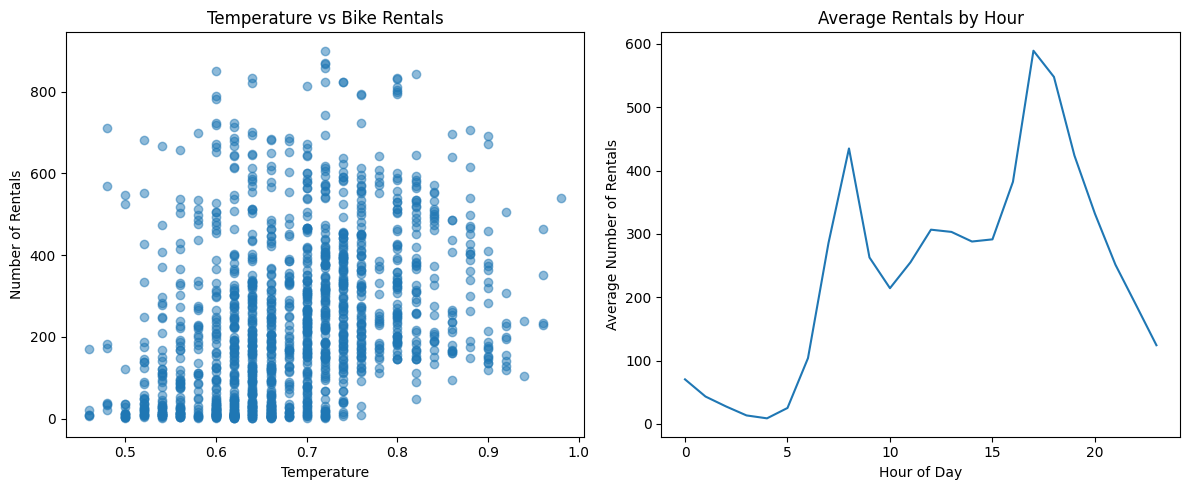

In [8]:
# Visualization
plt.figure(figsize=(12, 5))

# Temperature vs Rentals
plt.subplot(1, 2, 1)
plt.scatter(df_month['temp'], df_month['cnt'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Number of Rentals')
plt.title('Temperature vs Bike Rentals')

# Hour vs Rentals
plt.subplot(1, 2, 2)
hourly_avg = df_month.groupby('hr')['cnt'].mean()
plt.plot(hourly_avg.index, hourly_avg.values)
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.title('Average Rentals by Hour')
plt.tight_layout()
plt.show()

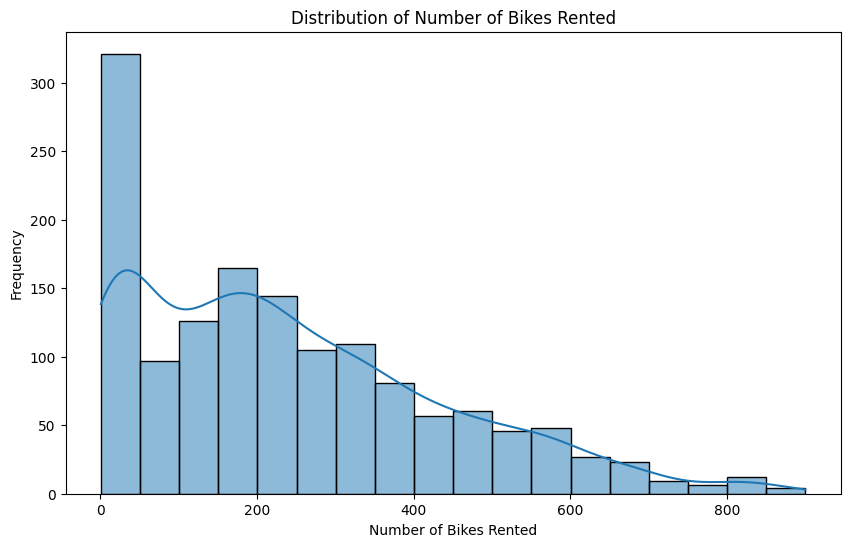

In [9]:

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data=df_month, x='cnt', kde=True)
plt.title('Distribution of Number of Bikes Rented')
plt.xlabel('Number of Bikes Rented')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Split and scale data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 3. Model Training and Evaluation

Train a linear regression model and evaluate its performance.

In [11]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance Metrics:
Mean Squared Error: 26813.1321
Root Mean Squared Error: 163.7472
Mean Absolute Error: 126.5222
R² Score: 0.3761


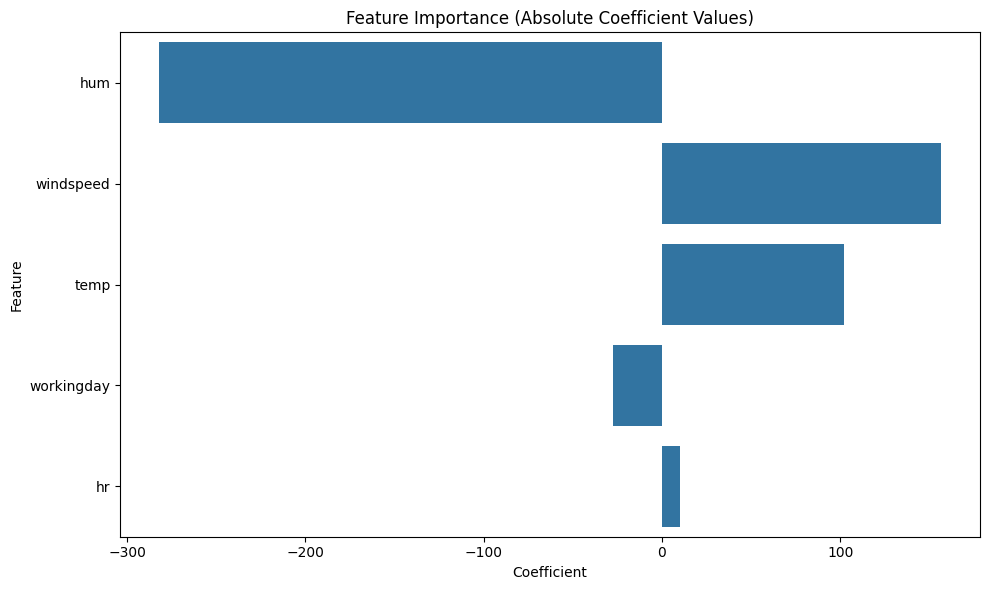

In [13]:
# Feature importance visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.tight_layout()
plt.show()

#### 4. Model Diagnostics and Validation

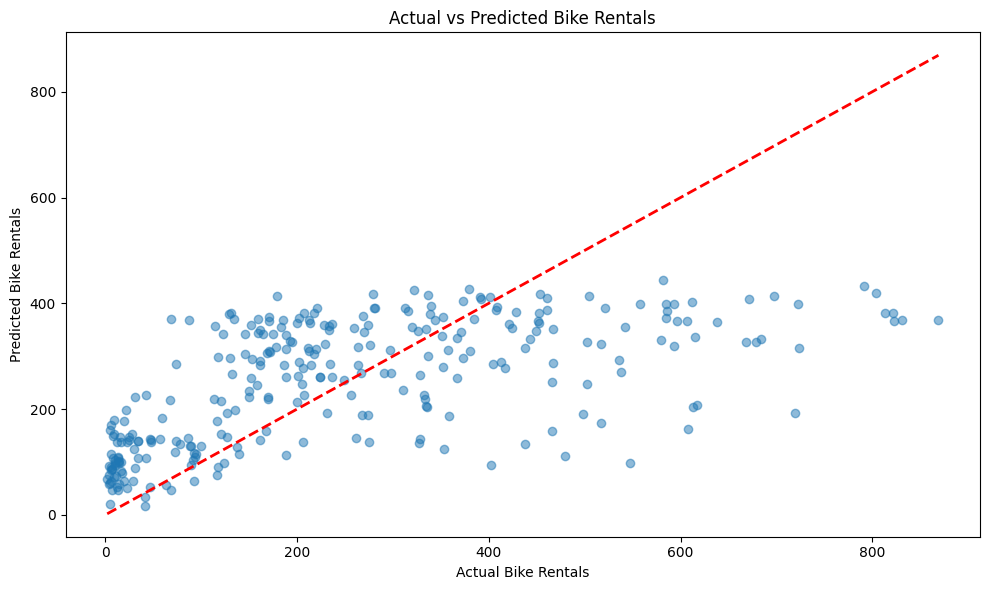

In [14]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals')
plt.tight_layout()
plt.show()

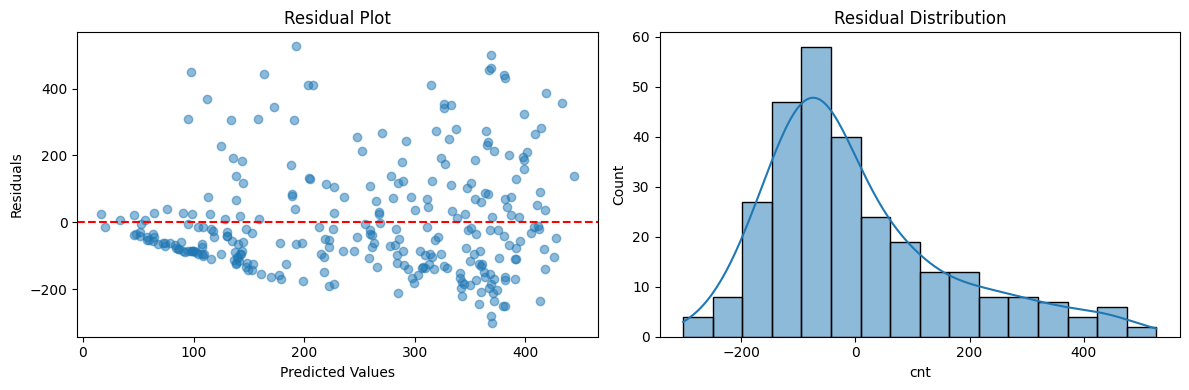

In [15]:
# Residual analysis
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.tight_layout()
plt.show()

In [16]:
# Example prediction
example_conditions = pd.DataFrame({
    'temp': [0.5],  # normalized temperature
    'hum': [0.6],
    'windspeed': [0.3],
    'hr': [17],  # 5 PM
    'workingday': [1]
})
example_scaled = scaler.transform(example_conditions)
predicted_rentals = model.predict(example_scaled)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print("\nFeature Coefficients:")
print(coef_df)
print(f"\nPredicted rentals for example conditions: {predicted_rentals[0]:.0f}")

R² Score: 0.3761
RMSE: 163.7472

Feature Coefficients:
      Feature  Coefficient  Abs_Coefficient
1         hum  -281.965301       281.965301
2   windspeed   156.518348       156.518348
0        temp   102.087032       102.087032
4  workingday   -27.654233        27.654233
3          hr    10.174994        10.174994

Predicted rentals for example conditions: 135


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
